# ESCOLHI ESSE MODELO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, Flatten, Dense,BatchNormalization,GlobalAveragePooling2D,Conv2D,Dropout,Flatten,Rescaling,Input
from keras import regularizers
from keras.callbacks import EarlyStopping,ModelCheckpoint

import os
import random
import cv2

In [2]:
data_path = r"C:\pastaImagensMangas"
img_size = (224,224)
batch_size = 32
mode = "rgb"
epochs = 50

In [3]:
def df_maker(path):
    file_paths = []
    labels = []

    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path,fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path,file)
            file_paths.append(file_path)
            labels.append(fold)


    file_series = pd.Series(file_paths,name="file_paths")
    label_series = pd.Series(labels,name="labels")

    df = pd.concat([file_series,label_series],axis=1)
    return df

In [4]:
df = df_maker(data_path)

In [5]:
df

file_paths       labels
0     C:\pastaImagensMangas\Anthracnose\20211008_124...  Anthracnose
1     C:\pastaImagensMangas\Anthracnose\20211008_124...  Anthracnose
2     C:\pastaImagensMangas\Anthracnose\20211008_124...  Anthracnose
3     C:\pastaImagensMangas\Anthracnose\20211008_124...  Anthracnose
4     C:\pastaImagensMangas\Anthracnose\20211008_124...  Anthracnose
...                                                 ...          ...
3995  C:\pastaImagensMangas\Sooty Mould\IMG_20211212...  Sooty Mould
3996  C:\pastaImagensMangas\Sooty Mould\IMG_20211212...  Sooty Mould
3997  C:\pastaImagensMangas\Sooty Mould\IMG_20211212...  Sooty Mould
3998  C:\pastaImagensMangas\Sooty Mould\IMG_20211212...  Sooty Mould
3999  C:\pastaImagensMangas\Sooty Mould\IMG_20211212...  Sooty Mould

[4000 rows x 2 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_paths  4000 non-null   object
 1   labels      4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [7]:
train_df,test_val_df= train_test_split(df ,train_size= 0.8, shuffle= True, random_state= 7, stratify=df["labels"])

In [8]:
test_df,val_df= train_test_split(test_val_df ,train_size= 0.5, shuffle= True, random_state= 7, stratify=test_val_df["labels"])

In [9]:
train_df

file_paths            labels
259   C:\pastaImagensMangas\Anthracnose\IMG_20211011...       Anthracnose
3841  C:\pastaImagensMangas\Sooty Mould\IMG_20211211...       Sooty Mould
2618  C:\pastaImagensMangas\Healthy\20211231_125103 ...           Healthy
1816  C:\pastaImagensMangas\Die Back\20211129_163933...          Die Back
3197  C:\pastaImagensMangas\Powdery Mildew\IMG_20211...    Powdery Mildew
...                                                 ...               ...
3784  C:\pastaImagensMangas\Sooty Mould\IMG_20211108...       Sooty Mould
1777  C:\pastaImagensMangas\Die Back\20211129_163119...          Die Back
2405  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...        Gall Midge
856   C:\pastaImagensMangas\Bacterial Canker\IMG_202...  Bacterial Canker
1321  C:\pastaImagensMangas\Cutting Weevil\20211011_...    Cutting Weevil

[3200 rows x 2 columns]

In [10]:
test_df

file_paths          labels
1086  C:\pastaImagensMangas\Cutting Weevil\20211011_...  Cutting Weevil
1559  C:\pastaImagensMangas\Die Back\20211129_160913...        Die Back
3704  C:\pastaImagensMangas\Sooty Mould\IMG_20211108...     Sooty Mould
3252  C:\pastaImagensMangas\Powdery Mildew\IMG_20211...  Powdery Mildew
2681  C:\pastaImagensMangas\Healthy\20211231_154828 ...         Healthy
...                                                 ...             ...
2224  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...      Gall Midge
2286  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...      Gall Midge
3373  C:\pastaImagensMangas\Powdery Mildew\IMG_20211...  Powdery Mildew
152   C:\pastaImagensMangas\Anthracnose\20211011_170...     Anthracnose
2029  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...      Gall Midge

[400 rows x 2 columns]

In [11]:
val_df

file_paths            labels
2202  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...        Gall Midge
437   C:\pastaImagensMangas\Anthracnose\IMG_20211011...       Anthracnose
2536  C:\pastaImagensMangas\Healthy\20211231_123716 ...           Healthy
912   C:\pastaImagensMangas\Bacterial Canker\IMG_202...  Bacterial Canker
440   C:\pastaImagensMangas\Anthracnose\IMG_20211011...       Anthracnose
...                                                 ...               ...
2076  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...        Gall Midge
2473  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...        Gall Midge
2253  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...        Gall Midge
617   C:\pastaImagensMangas\Bacterial Canker\IMG_202...  Bacterial Canker
3876  C:\pastaImagensMangas\Sooty Mould\IMG_20211211...       Sooty Mould

[400 rows x 2 columns]

In [12]:
df.labels.value_counts()

labels
Anthracnose         500
Bacterial Canker    500
Cutting Weevil      500
Die Back            500
Gall Midge          500
Healthy             500
Powdery Mildew      500
Sooty Mould         500
Name: count, dtype: int64

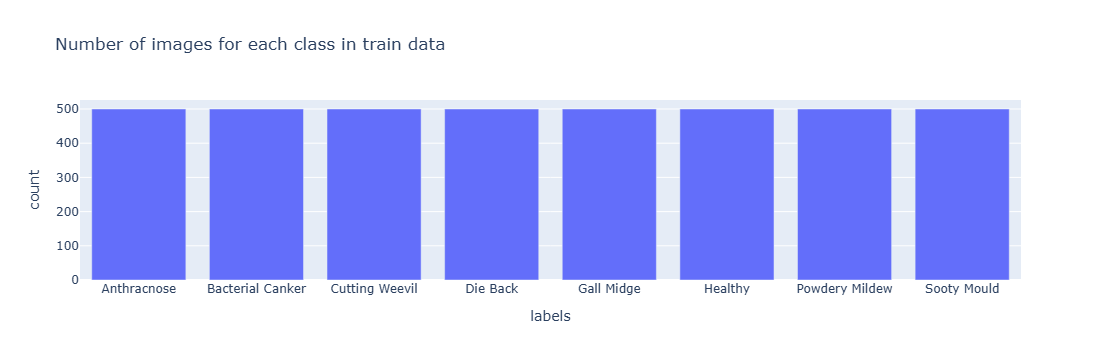

In [13]:
iplot(px.bar(
    data_frame = df.labels.value_counts().reset_index(),
    x="labels",
    y="count",
    title="Number of images for each class in train data"
))

In [14]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [15]:
train_data = train_datagen.flow_from_dataframe(
    train_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)
test_data = test_datagen.flow_from_dataframe(
    test_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)
val_data = val_datagen.flow_from_dataframe(
    val_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

Found 3200 validated image filenames belonging to 8 classes.
Found 400 validated image filenames belonging to 8 classes.
Found 400 validated image filenames belonging to 8 classes.


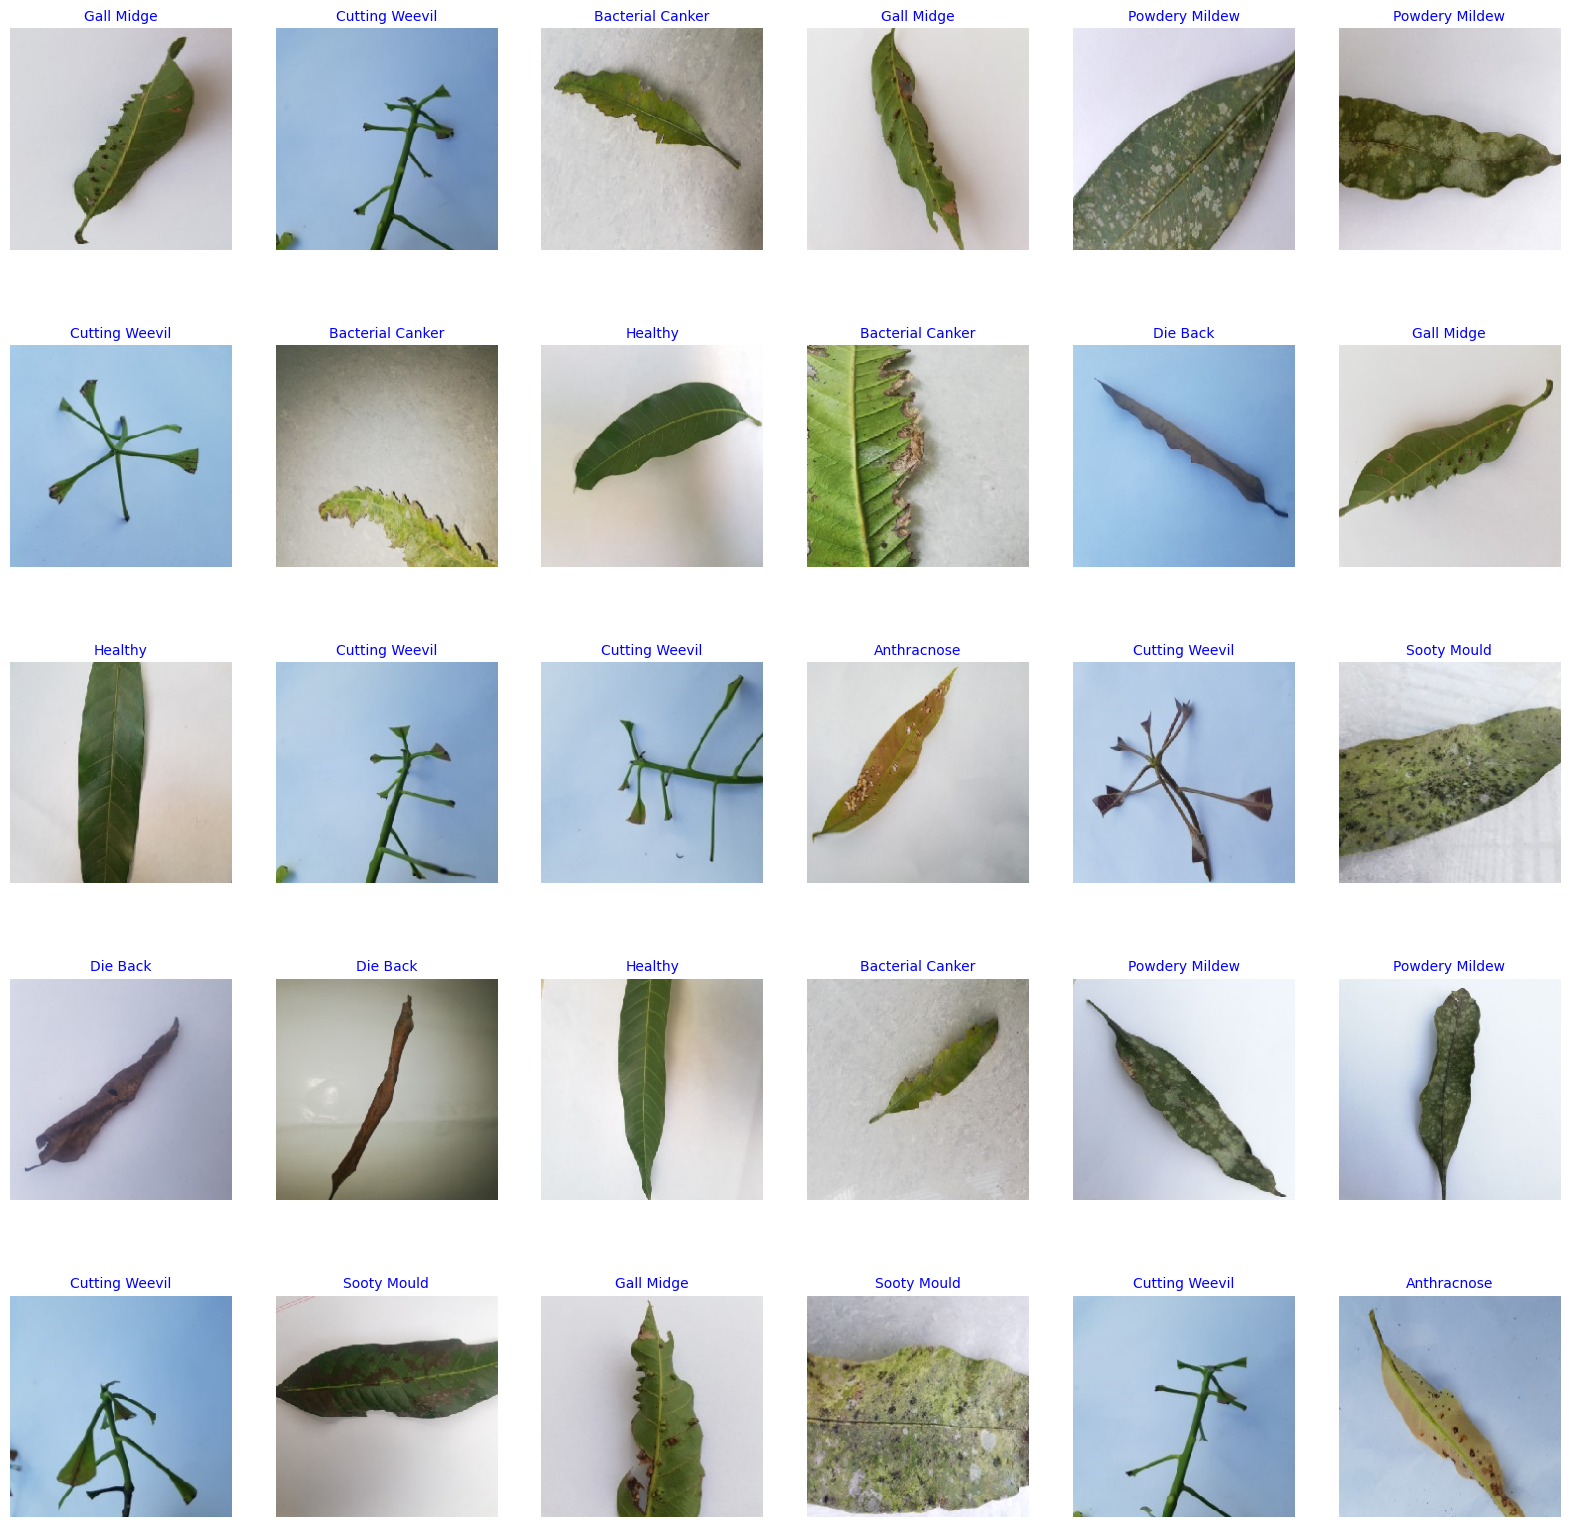

In [16]:
g_dict = train_data.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_data)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 24))

for i in range(30):
    plt.subplot(6, 6, i + 1)
    image = images[i]/255
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 10)
    plt.axis('off')

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import tensorflow as tf

def create_lightweight_model(input_shape, num_classes):
    model = Sequential()

    # Definir explicitamente a camada de entrada
    model.add(Input(shape=input_shape))
    
    # Primeira camada convolucional
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Segunda camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Terceira camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Quarta camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Quinta camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Sexta camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Achatar as saídas das camadas convolucionais
    model.add(Flatten())
    
    # Camada densa com 64 neurônios e ativação ReLU
    model.add(Dense(64, activation='relu'))
    
    # Camada de saída com softmax para classificação
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Parâmetros de entrada e saída
input_shape = (224, 224, 3)
num_classes = len(classes)

# Criar e compilar o modelo
model = create_lightweight_model(input_shape, num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [18]:
# Resumo do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,784 (671.03 KB)

 Trainable params: 171,784 (671.03 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Treinamento do modelo
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
)

print("ok")

Epoch 1/50


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.3084 - loss: 2.5450 - val_accuracy: 0.6750 - val_loss: 0.8438
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.7012 - loss: 0.7931 - val_accuracy: 0.8250 - val_loss: 0.4695
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.8246 - loss: 0.4587 - val_accuracy: 0.8675 - val_loss: 0.3530
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.8351 - loss: 0.4435 - val_accuracy: 0.8950 - val_loss: 0.2801
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.8722 - loss: 0.3514 - val_accuracy: 0.8275 - val_loss: 0.4552
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.8957 - loss: 0.2811 - val_accuracy: 0.8825 - val_loss: 0.2999
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.9228 - loss: 0.2164 - val_accuracy: 0.9175 - val_loss: 0.2685
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.9519 - loss: 0.1309 - val

In [20]:
vals = pd.DataFrame(history.history)
vals = vals.rename(columns={"loss":"Train Loss","val_loss":"Validation Loss","accuracy":"Train Accuracy","val_accuracy":"Validation Accuracy"})

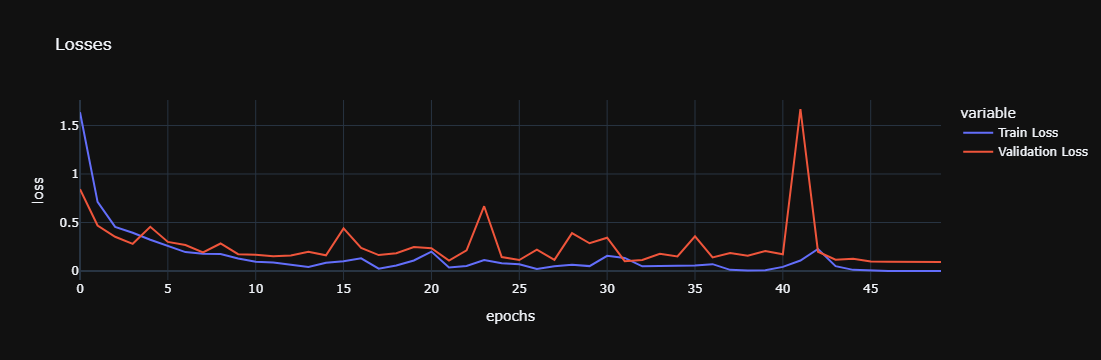

In [21]:
iplot(px.line(data_frame=vals,
              y = ["Train Loss","Validation Loss"],
              labels={"index":"epochs","value":"loss"},
              title = "Losses",
              template="plotly_dark"))

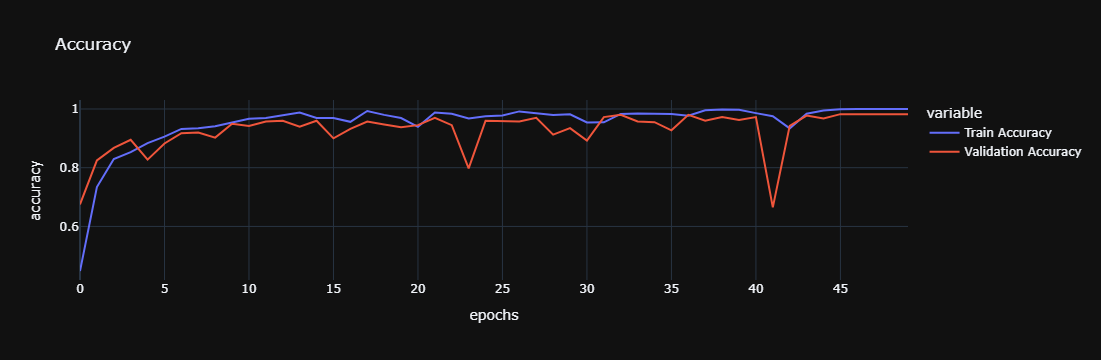

In [22]:
iplot(px.line(data_frame=vals,
              y = ["Train Accuracy","Validation Accuracy"],
              labels={"index":"epochs","value":"accuracy"},
              title = "Accuracy",
              template="plotly_dark"))

In [23]:
# Salvar o modelo
model.save('modelo_lcnn_versao4.keras')

In [19]:
from tensorflow import keras
model = keras.models.load_model('modelo_lcnn_versao4.keras')

In [20]:
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis = 1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [22]:
print(classification_report(y_true,y_pred, target_names=class_labels))

                  precision    recall  f1-score   support

     Anthracnose       1.00      1.00      1.00        50
Bacterial Canker       0.96      0.98      0.97        50
  Cutting Weevil       1.00      1.00      1.00        50
        Die Back       1.00      1.00      1.00        50
      Gall Midge       0.96      0.94      0.95        50
         Healthy       0.94      0.98      0.96        50
  Powdery Mildew       0.98      0.98      0.98        50
     Sooty Mould       0.98      0.94      0.96        50

        accuracy                           0.98       400
       macro avg       0.98      0.98      0.98       400
    weighted avg       0.98      0.98      0.98       400



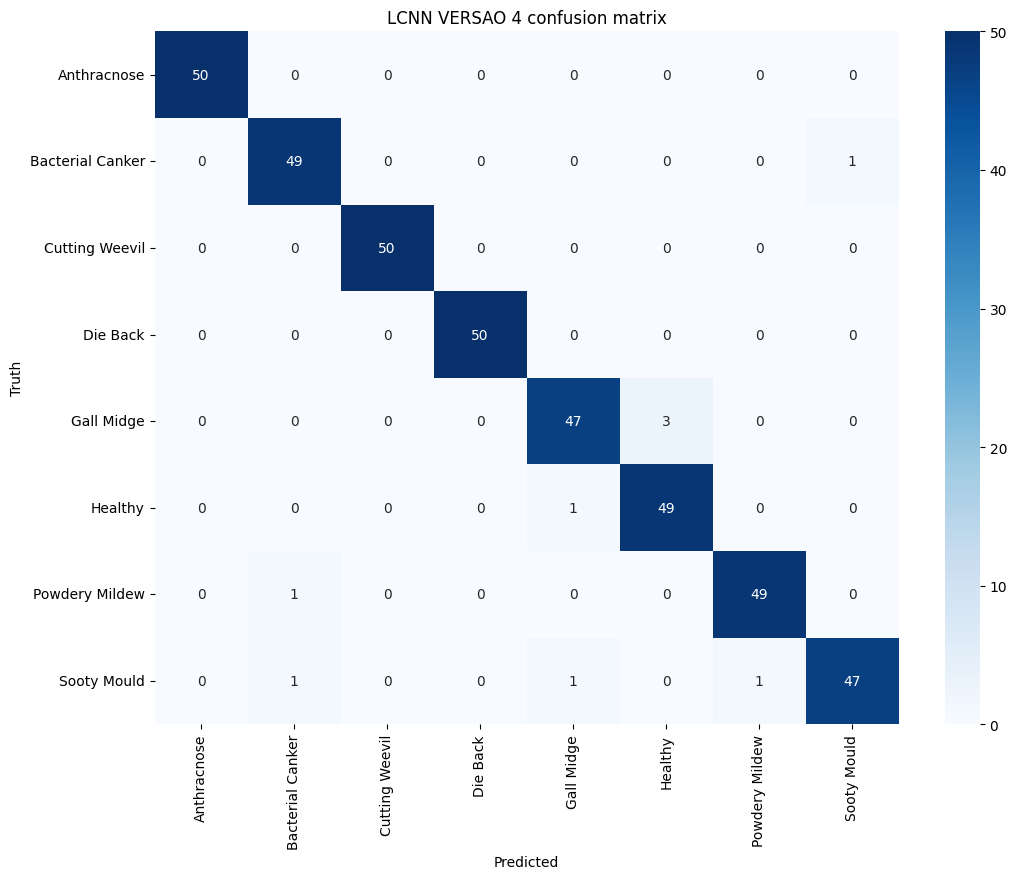

In [27]:
plt.figure(figsize = (12,9))
cm = confusion_matrix(y_true, y_pred)
# sns.heatmap(cm, annot=True,fmt='d',cmap= plt.cm.Blues)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("LCNN VERSAO 4 confusion matrix")
plt.show()

In [28]:
def funcaoParaObterAcuraciaParaMultiClasses(verdade, predicao, numeroDeClasses, ImagensPorClasse):
    
    vetorAuxiliar = [0 for _ in range(numeroDeClasses)]

    for i in range(0, len(predicao)):
        if verdade[i] == predicao[i]:
            vetorAuxiliar[verdade[i]] = vetorAuxiliar[(verdade[i])] + 1

    vetorDeAcuracia = [0, 0, 0, 0, 0, 0, 0, 0]
    
        
    for i in range(0, len(vetorAuxiliar)):
        vetorDeAcuracia[i] = vetorAuxiliar[i]/ImagensPorClasse
        
    return vetorDeAcuracia

nomeDasClasses = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

acuracias = funcaoParaObterAcuraciaParaMultiClasses(y_true, y_pred, 8, 50)

print("Acurácias")
for i in range(0, len(nomeDasClasses)):
    print(nomeDasClasses[i], " - ", acuracias[i])



Acurácias
Anthracnose  -  1.0
Bacterial Canker  -  0.98
Cutting Weevil  -  1.0
Die Back  -  1.0
Gall Midge  -  0.94
Healthy  -  0.98
Powdery Mildew  -  0.98
Sooty Mould  -  0.94


# Avaliando o modelo para os Bancos Corrompidos

Onde vai gerar um classification_report para cada bando e será armazenado em um excel

In [29]:
# Avaliação dos 95 bancos de dados corrompidos (INSERIR CÓDIGO AQUI)
# Função para processar e avaliar cada banco corrompido
import pandas as pd
import numpy as np
import os
from tensorflow import keras

def funcaoParaObterAcuraciaParaMultiClasses(verdade, predicao, numeroDeClasses, ImagensPorClasse):
    
    vetorAuxiliar = [0 for _ in range(numeroDeClasses)]

    for i in range(0, len(predicao)):
        if verdade[i] == predicao[i]:
            vetorAuxiliar[verdade[i]] = vetorAuxiliar[(verdade[i])] + 1

    vetorDeAcuracia = [0, 0, 0, 0, 0, 0, 0, 0]
    
        
    for i in range(0, len(vetorAuxiliar)):
        vetorDeAcuracia[i] = vetorAuxiliar[i]/ImagensPorClasse
        
    return vetorDeAcuracia



def df_maker(path):
    file_paths = []
    labels = []

    # Listando as pastas dentro do diretório base (representam as classes)
    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path, fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path, file)
            file_paths.append(file_path)
            labels.append(fold)

    # Criando uma série para caminhos e rótulos
    file_series = pd.Series(file_paths, name="file_paths")
    label_series = pd.Series(labels, name="labels")

    # Concatenando as séries para formar um dataframe
    df = pd.concat([file_series, label_series], axis=1)
    return df



def evaluate_corrupted_model(model, corrupted_data_path, corruption_name):
    # Cria o dataframe com o caminho das imagens e rótulos
    corrupted_df = df_maker(corrupted_data_path)
    
    # Cria o generator para o banco corrompido
    corrupted_datagen = ImageDataGenerator()
    corrupted_data = corrupted_datagen.flow_from_dataframe(
        corrupted_df,
        x_col="file_paths",
        y_col="labels",
        target_size=(224, 224),
        color_mode=mode,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False,
    )

    # Realiza as predições
    predictions = model.predict(corrupted_data)
    y_pred = np.argmax(predictions, axis=1)
    y_true = corrupted_data.classes

    # Calcula e coleta métricas
    report = classification_report(y_true, y_pred, output_dict=True, zero_division = 0)
    report['corruption'] = corruption_name  # Adiciona o nome da corrupção para referência
    
    acuraciaPorClasse = funcaoParaObterAcuraciaParaMultiClasses(y_true, y_pred, 8, ImagensPorClasse=500)

    report['acuraciaPorClasse'] = acuraciaPorClasse
    
    return report

# Para carregar depois
model = keras.models.load_model('modelo_lcnn_versao4.keras')

base_path = r"C:\criacaoBanco\bancos"

corruption_types = [
    "Brightness", "Contrast", "Defocus Blur", "Elastic", "Fog",
    "Frost", "Gaussian Blur", "Gaussian Noise", "Glass Blur",
    "Impulse Noise", "JPEG", "Motion Blur", "Pixelate", "Saturate",
    "Shot Noise", "Snow", "Spatter", "Speckle Noise", "Zoom Blur"
]

severities = [1, 2, 3, 4, 5]

corrupted_paths = [
    os.path.join(base_path, f"{corruption}_severity_{severity}")
    for corruption in corruption_types
    for severity in severities
]

# Avaliação de todos os bancos
results = []
# Validar caminhos
for path in corrupted_paths:
    if not os.path.exists(path):
        print(f"Aviso: O caminho {path} não existe e será ignorado.")
        continue
    corruption_name = os.path.basename(path).replace("_", " ")
    print(corruption_name)
    report = evaluate_corrupted_model(model, path, corruption_name)
    results.append(report)


# Criar e salvar DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv("resultadosDalccnParaCadaBancoModeloEscolhido.csv", index=False)


# # Cria o DataFrame com os resultados para visualização
# results_df = pd.DataFrame(results)
# print(results_df)

Brightness severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step
Brightness severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step
Brightness severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step
Brightness severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step
Brightness severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step
Contrast severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step
Contrast severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step
Contrast severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step
Contrast severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step
Contrast severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step
Defocus Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step
Defocus Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step
Defocus Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step
Defocus Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step
Defocus Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step
Elastic severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step
Elastic severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step
Elastic severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step
Elastic severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step
Elastic severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step
Fog severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step
Fog severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step
Fog severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step
Fog severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step
Fog severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step
Frost severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step
Frost severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step
Frost severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step
Frost severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step
Frost severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step
Gaussian Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step
Gaussian Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step
Gaussian Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step
Gaussian Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step
Gaussian Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step
Gaussian Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 189ms/step
Gaussian Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step
Gaussian Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step
Gaussian Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step
Gaussian Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step
Glass Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step
Glass Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step
Glass Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step
Glass Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 192ms/step
Glass Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 168ms/step
Impulse Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step
Impulse Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step
Impulse Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step
Impulse Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step
Impulse Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step
JPEG severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step
JPEG severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step
JPEG severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step
JPEG severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step
JPEG severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step
Motion Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step
Motion Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step
Motion Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step
Motion Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step
Motion Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step
Pixelate severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step
Pixelate severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step
Pixelate severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step
Pixelate severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step
Pixelate severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step
Saturate severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step
Saturate severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step
Saturate severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step
Saturate severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step
Saturate severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step
Shot Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step
Shot Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step
Shot Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step
Shot Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step
Shot Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step
Snow severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step
Snow severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step
Snow severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step
Snow severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step
Snow severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step
Spatter severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step
Spatter severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step
Spatter severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step
Spatter severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step
Spatter severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step
Speckle Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step
Speckle Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step
Speckle Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step
Speckle Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step
Speckle Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step
Zoom Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step
Zoom Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step
Zoom Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step
Zoom Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step
Zoom Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step


# Tabela métricas gerais de cada Banco Corrompido e sua severidade

Tabela no excel com as métricas gerais de cada banco

In [31]:
import pandas as pd
import ast

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultadosDalccnParaCadaBancoModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['macro avg', 'accuracy', 'corruption']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Inicializar variáveis para somar os valores
somaPrecision = 0
somaRecall = 0
somaF1Score = 0
somaAcuracia = 0

# Criar um novo DataFrame para armazenar os resultados
novodf = pd.DataFrame(columns=['precision', 'recall', 'f1-score', 'corruption', 'acuracia'])

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    try:
        # Converter a string da coluna 'macro avg' em um dicionário
        dicionario = ast.literal_eval(row['macro avg'])
        
        # Somar os valores
        somaPrecision += dicionario['precision']
        somaRecall += dicionario['recall']
        somaF1Score += dicionario['f1-score']
        somaAcuracia += row['accuracy']
        
        # Adicionar uma nova linha ao novo DataFrame
        novalinha = {
            'precision': dicionario['precision'],
            'recall': dicionario['recall'],
            'f1-score': dicionario['f1-score'],
            'corruption': row['corruption'],
            'acuracia': row['accuracy']
        }
        
        # Usar pd.concat para adicionar a nova linha
        novodf = pd.concat([novodf, pd.DataFrame([novalinha])], ignore_index=True)
    
    except (ValueError, SyntaxError):
        # Caso ocorra um erro ao converter a string para dicionário
        print(f"Erro ao processar a linha {index}: {row['macro avg']}")
        continue

# Calcular as médias
total_linhas = len(df)
if total_linhas > 0:
    mediaPrecision = somaPrecision / total_linhas
    mediaRecall = somaRecall / total_linhas
    mediaF1Score = somaF1Score / total_linhas
else:
    mediaPrecision = mediaRecall = mediaF1Score = 0

# Exibir os resultados
print("\nResultado Geral:")
print(f"Precision: {mediaPrecision}")
print(f"Recall: {mediaRecall}")
print(f"f1-score: {mediaF1Score}")
print(f"Acuracia: {somaAcuracia}")

# Exibir o novo DataFrame
print("\nNovo DataFrame:")
print(novodf)

# Salvar o novo DataFrame em um arquivo .xlsx
caminho_arquivo_saida = r"C:\projeto\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido.xlsx"
novodf.to_excel(caminho_arquivo_saida, index=False)
print(f"DataFrame salvo com sucesso em: {caminho_arquivo_saida}")

DataFrame inicial:
    accuracy                                          macro avg  \
0    0.99425  {'precision': 0.9942685776022022, 'recall': 0....   
1    0.99050  {'precision': 0.9905811737041152, 'recall': 0....   
2    0.97750  {'precision': 0.9787176364482222, 'recall': 0....   
3    0.95275  {'precision': 0.9584065483322232, 'recall': 0....   
4    0.84200  {'precision': 0.8902488214989048, 'recall': 0....   
..       ...                                                ...   
90   0.97825  {'precision': 0.9789892695633716, 'recall': 0....   
91   0.92850  {'precision': 0.9367640017018561, 'recall': 0....   
92   0.87500  {'precision': 0.9000359402938052, 'recall': 0....   
93   0.81425  {'precision': 0.8650524973002661, 'recall': 0....   
94   0.76400  {'precision': 0.8406654407854043, 'recall': 0....   

               corruption  
0   Brightness severity 1  
1   Brightness severity 2  
2   Brightness severity 3  
3   Brightness severity 4  
4   Brightness severity 5  
..      

C:\Users\Gabriel Vitorino\AppData\Local\Temp\ipykernel_18144\2274294869.py:48: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



# TABELA GERAL DE AVALIAÇÃO DO MODELO EM RELAÇÃO AOS BANCOS CORROMPIDOS

In [37]:
import pandas as pd
import ast

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultadosDalccnParaCadaBancoModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['0', '1', '2', '3', '4', '5', '6', '7', 'acuraciaPorClasse']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Inicializar os dicionários para cada classe
Anthracnose = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
BacterialCanker = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
CuttingWeevil = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
DieBack = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
GallMidge = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
Healthy = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
PowderyMildew = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
SootyMould = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Converter a string da coluna 'macro avg' em um dicionário
    classe0 = ast.literal_eval(row['0'])
    classe1 = ast.literal_eval(row['1'])
    classe2 = ast.literal_eval(row['2'])
    classe3 = ast.literal_eval(row['3'])
    classe4 = ast.literal_eval(row['4'])
    classe5 = ast.literal_eval(row['5'])
    classe6 = ast.literal_eval(row['6'])
    classe7 = ast.literal_eval(row['7'])
    
    # Converter a string da coluna 'acuraciaPorClasse' em uma lista
    classe8 = ast.literal_eval(row['acuraciaPorClasse'])
    
    # Somar os valores para cada classe
    Anthracnose['precision'] += classe0['precision']
    Anthracnose['recall'] += classe0['recall']
    Anthracnose['f1-score'] += classe0['f1-score']
    Anthracnose['acuracia'] += float(classe8[0])  # Converter para float
    
    BacterialCanker['precision'] += classe1['precision']
    BacterialCanker['recall'] += classe1['recall']
    BacterialCanker['f1-score'] += classe1['f1-score']
    BacterialCanker['acuracia'] += float(classe8[1])  # Converter para float
    
    CuttingWeevil['precision'] += classe2['precision']
    CuttingWeevil['recall'] += classe2['recall']
    CuttingWeevil['f1-score'] += classe2['f1-score']
    CuttingWeevil['acuracia'] += float(classe8[2])  # Converter para float
    
    DieBack['precision'] += classe3['precision']
    DieBack['recall'] += classe3['recall']
    DieBack['f1-score'] += classe3['f1-score']
    DieBack['acuracia'] += float(classe8[3])  # Converter para float
    
    GallMidge['precision'] += classe4['precision']
    GallMidge['recall'] += classe4['recall']
    GallMidge['f1-score'] += classe4['f1-score']
    GallMidge['acuracia'] += float(classe8[4])  # Converter para float
    
    Healthy['precision'] += classe5['precision']
    Healthy['recall'] += classe5['recall']
    Healthy['f1-score'] += classe5['f1-score']
    Healthy['acuracia'] += float(classe8[5])  # Converter para float
    
    PowderyMildew['precision'] += classe6['precision']
    PowderyMildew['recall'] += classe6['recall']
    PowderyMildew['f1-score'] += classe6['f1-score']
    PowderyMildew['acuracia'] += float(classe8[6])  # Converter para float
    
    SootyMould['precision'] += classe7['precision']
    SootyMould['recall'] += classe7['recall']
    SootyMould['f1-score'] += classe7['f1-score']
    SootyMould['acuracia'] += float(classe8[7])  # Converter para float

# Criar um DataFrame com os resultados
resultados = pd.DataFrame([Anthracnose, BacterialCanker, CuttingWeevil, DieBack, GallMidge, Healthy, PowderyMildew, SootyMould])

# Dividir cada valor do DataFrame por 95
resultados = resultados / 95

# Exibir o DataFrame com os resultados
print("DataFrame com os resultados (dividido por 95):")
print(resultados)

# Exportar o DataFrame para um arquivo Excel
caminho_saida = r"C:\projeto\resultados_classes_lcnnModeloEscolhido.xlsx"
resultados.to_excel(caminho_saida, index=False)

print(f"Os resultados foram exportados para o arquivo: {caminho_saida}")

DataFrame inicial:
                                                    0  \
0   {'precision': 0.9900990099009901, 'recall': 1....   
1   {'precision': 0.9784735812133072, 'recall': 1....   
2   {'precision': 0.9057971014492754, 'recall': 1....   
3   {'precision': 0.8077544426494345, 'recall': 1....   
4   {'precision': 0.5526024363233666, 'recall': 0....   
..                                                ...   
90  {'precision': 0.9328358208955224, 'recall': 1....   
91  {'precision': 0.778816199376947, 'recall': 1.0...   
92  {'precision': 0.6613756613756614, 'recall': 1....   
93  {'precision': 0.578215527230591, 'recall': 0.9...   
94  {'precision': 0.5171339563862928, 'recall': 0....   

                                                    1  \
0   {'precision': 0.9940119760479041, 'recall': 0....   
1   {'precision': 0.9900596421471173, 'recall': 0....   
2   {'precision': 0.9803149606299213, 'recall': 0....   
3   {'precision': 0.9576923076923077, 'recall': 0....   
4   {'preci

# GERAR O GRÁFICO DA AVALIAÇÃO DOS BANCOS

DataFrame inicial:
    f1-score             corruption
0   0.994247  Brightness severity 1
1   0.990499  Brightness severity 2
2   0.977653  Brightness severity 3
3   0.953443  Brightness severity 4
4   0.846311  Brightness severity 5
..       ...                    ...
90  0.978263   Zoom Blur severity 1
91  0.928571   Zoom Blur severity 2
92  0.874529   Zoom Blur severity 3
93  0.811204   Zoom Blur severity 4
94  0.756392   Zoom Blur severity 5

[95 rows x 2 columns]
    corruption  severidade  f1-score
0   Brightness           1  0.994247
1   Brightness           2  0.990499
2   Brightness           3  0.977653
3   Brightness           4  0.953443
4   Brightness           5  0.846311
..         ...         ...       ...
90   Zoom Blur           1  0.978263
91   Zoom Blur           2  0.928571
92   Zoom Blur           3  0.874529
93   Zoom Blur           4  0.811204
94   Zoom Blur           5  0.756392

[95 rows x 3 columns]


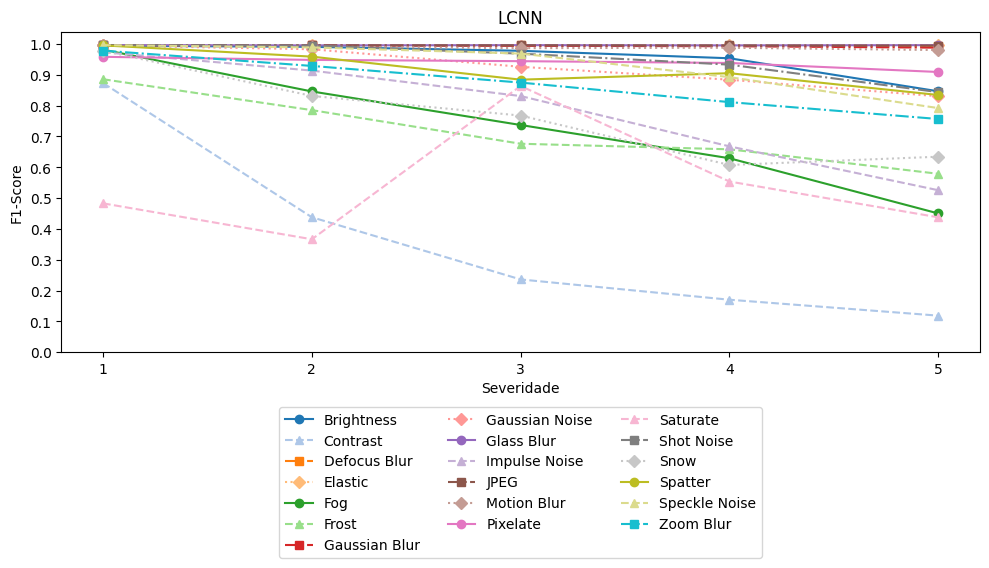

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['f1-score', 'corruption']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

novodf = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # String de exemplo
    string = row['corruption']
    # Dividir a string em uma lista de palavras
    parts = string.split()
    corrupcao = ''
    severidade = 0
    # Verificar se a lista tem exatamente 3 elementos
    if len(parts) == 3:
        corrupcao = parts[0]
        severidade = int(parts[2])  # Convertendo para inteiro
    elif len(parts) == 4:
        corrupcao = parts[0] + " " + parts[1]
        severidade = int(parts[3])  # Convertendo para inteiro
    
    novodf.loc[index] = [corrupcao, severidade, row['f1-score']]

print(novodf)

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Lista de cores únicas para as linhas (usando uma paleta maior)
cores = plt.cm.tab20.colors  # Usa 20 cores únicas

# Lista de estilos de linhas e marcadores
linestyles = ['-', '--', '-.', ':']  # Estilos de linhas
markers = ['o', '^', 's', 'D']       # Marcadores (bolinha, triângulo, quadrado, diamante)

# Dicionário para mapear cada corrupção a uma cor única
cor_mapping = {}
cor_index = 0

# Agrupar os dados por corrupção
for i, (name, group) in enumerate(novodf.groupby('corruption')):
    # Ordenar os valores de severidade
    group = group.sort_values(by='severidade')
    
    # Atribuir uma cor única para cada corrupção
    if name not in cor_mapping:
        cor_mapping[name] = cores[cor_index]
        cor_index = (cor_index + 1) % len(cores)  # Avança para a próxima cor
    
    # Escolher o estilo de linha e marcador alternadamente
    linestyle = linestyles[i % len(linestyles)]
    marker = markers[i % len(markers)]
    
    # Plotar o gráfico com a cor única e estilo alternado
    plt.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

# Adicionar rótulos e título
plt.xlabel('Severidade')
plt.ylabel('F1-Score')
plt.title('LCNN')

# Definir os ticks do eixo x como 1, 2, 3, 4, 5
plt.xticks([1, 2, 3, 4, 5])

# Adicionar mais ticks no eixo y
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Adicionar a legenda embaixo do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [1]:
import pandas as pd
import sys

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['corruption', 'acuracia']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Criar um novo DataFrame vazio
novodf = pd.DataFrame(columns=['corruption', 'somaDasAcuracia', 'qtdItens'])

# Função para verificar se uma string já existe na coluna 'corruption'
def verifica_corrupcao_existente(df, string):
    """
    Verifica se uma string já existe na coluna 'corruption' do DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame onde a verificação será feita.
    string (str): A string que será verificada.

    Retorna:
    bool: True se a string já existe na coluna 'corruption', False caso contrário.
    """
    return string in df['corruption'].values

def get_prefix_before_severity(text):
    """
    Extrai a parte da string antes da primeira ocorrência de "severity".

    Parâmetros:
    text (str): A string original.

    Retorna:
    str: A parte da string antes de "severity".
    """
    # Divide a string na primeira ocorrência de "severity"
    parts = text.split("severity", 1)
    
    # Retorna a parte antes de "severity" e remove espaços em branco extras
    return parts[0].strip()

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Extrai o prefixo antes de "severity"
    string = get_prefix_before_severity(row['corruption'])
    
    # Verifica se o prefixo já existe no novo DataFrame
    if verifica_corrupcao_existente(novodf, string):
        # Se existir, incrementa a soma das acurácias e a quantidade de itens
        novodf.loc[novodf['corruption'] == string, 'somaDasAcuracia'] += row['acuracia']
        novodf.loc[novodf['corruption'] == string, 'qtdItens'] += 1
    else:
        # Se não existir, adiciona uma nova linha ao DataFrame usando pd.concat
        nova_linha = pd.DataFrame({'corruption': [string], 'somaDasAcuracia': [row['acuracia']], 'qtdItens': [1]})
        novodf = pd.concat([novodf, nova_linha], ignore_index=True)

novodf2 = pd.DataFrame(columns=['corruption', 'acuraciaMediaDasCorrupcoes'])

# Iterar sobre as linhas do DataFrame
for index, row in novodf.iterrows():
        nova_linha = pd.DataFrame({'corruption': [row['corruption']], 'acuraciaMediaDasCorrupcoes': [row['somaDasAcuracia']/row['qtdItens']]})
        novodf2 = pd.concat([novodf2, nova_linha], ignore_index=True)
        

novodf2 = novodf2.sort_values(by='acuraciaMediaDasCorrupcoes', ascending=False)

print("Dataframe Final Ordenado:")
print(novodf2)

# Pegar as 3 melhores e as 3 piores corrupções
top_3_melhores = novodf2.head(3)
top_3_piores = novodf2.tail(3)

# Exibir os resultados
print("\n3 melhores corrupções:")
print(top_3_melhores)

print("\n3 piores corrupções:")
print(top_3_piores)

DataFrame inicial:
               corruption  acuracia
0   Brightness severity 1   0.99425
1   Brightness severity 2   0.99050
2   Brightness severity 3   0.97750
3   Brightness severity 4   0.95275
4   Brightness severity 5   0.84200
..                    ...       ...
90   Zoom Blur severity 1   0.97825
91   Zoom Blur severity 2   0.92850
92   Zoom Blur severity 3   0.87500
93   Zoom Blur severity 4   0.81425
94   Zoom Blur severity 5   0.76400

[95 rows x 2 columns]
Dataframe Final Ordenado:
        corruption  acuraciaMediaDasCorrupcoes
8       Glass Blur                     0.99575
3          Elastic                     0.99525
10            JPEG                     0.99525
2     Defocus Blur                     0.99450
6    Gaussian Blur                     0.99295
11     Motion Blur                     0.98800
0       Brightness                     0.95140
14      Shot Noise                     0.94660
12        Pixelate                     0.93975
17   Speckle Noise            

C:\Users\Gabriel Vitorino\AppData\Local\Temp\ipykernel_15668\3962136210.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  novodf = pd.concat([novodf, nova_linha], ignore_index=True)
C:\Users\Gabriel Vitorino\AppData\Local\Temp\ipykernel_15668\3962136210.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  novodf2 = pd.concat([novodf2, nova_linha], ignore_index=True)


# GERANDO GRÁFICO E G3 Z3 AO MESMO TEMPO

DataFrame inicial:
    f1-score             corruption  acuracia
0   0.994247  Brightness severity 1   0.99425
1   0.990499  Brightness severity 2   0.99050
2   0.977653  Brightness severity 3   0.97750
3   0.953443  Brightness severity 4   0.95275
4   0.846311  Brightness severity 5   0.84200
..       ...                    ...       ...
90  0.978263   Zoom Blur severity 1   0.97825
91  0.928571   Zoom Blur severity 2   0.92850
92  0.874529   Zoom Blur severity 3   0.87500
93  0.811204   Zoom Blur severity 4   0.81425
94  0.756392   Zoom Blur severity 5   0.76400

[95 rows x 3 columns]

3 melhores corrupções:
    corruption  acuraciaMediaDasCorrupcoes
8   Glass Blur                     0.99575
3      Elastic                     0.99525
10        JPEG                     0.99525

3 piores corrupções:
   corruption  acuraciaMediaDasCorrupcoes
5       Frost                     0.73540
13   Saturate                     0.58215
1    Contrast                     0.43475


C:\Users\Gabriel Vitorino\AppData\Local\Temp\ipykernel_15668\3004736453.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  novodf = pd.concat([novodf, nova_linha], ignore_index=True)
C:\Users\Gabriel Vitorino\AppData\Local\Temp\ipykernel_15668\3004736453.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  novodf2 = pd.concat([novodf2, nova_linha], ignore_index=True)


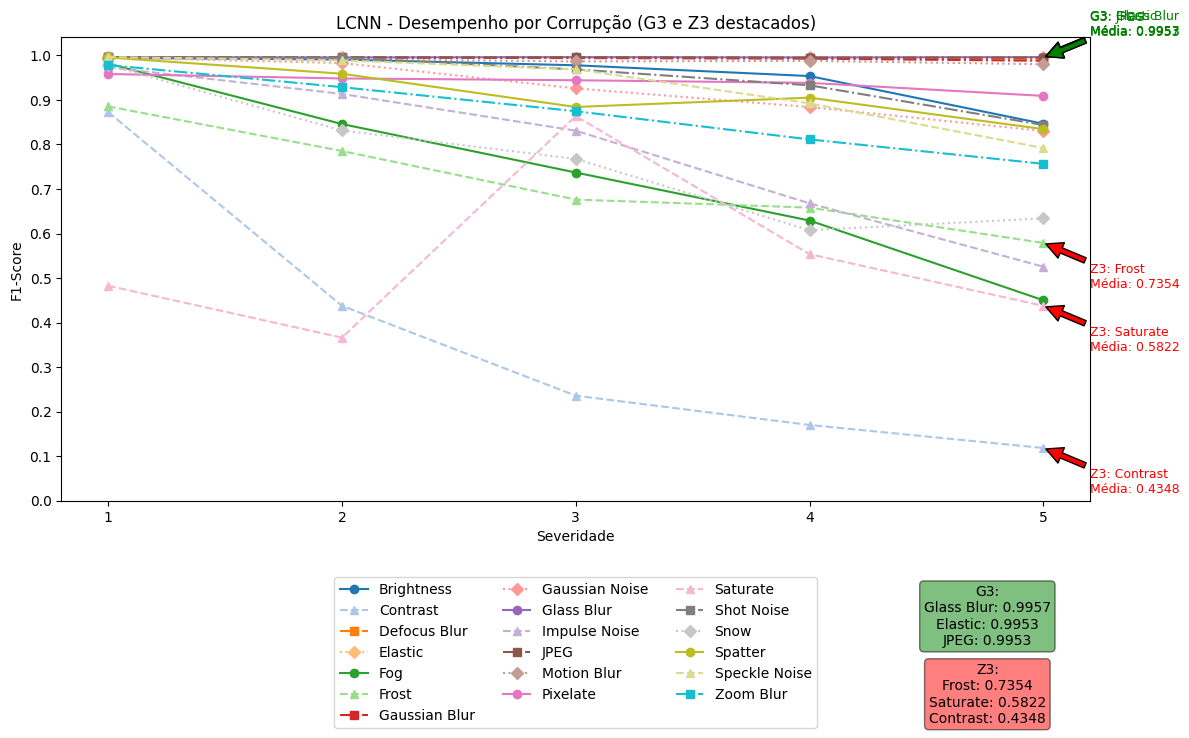

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['corruption', 'acuracia', 'f1-score']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Criar um novo DataFrame vazio
novodf = pd.DataFrame(columns=['corruption', 'somaDasAcuracia', 'qtdItens'])

# Função para verificar se uma string já existe na coluna 'corruption'
def verifica_corrupcao_existente(df, string):
    """
    Verifica se uma string já existe na coluna 'corruption' do DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame onde a verificação será feita.
    string (str): A string que será verificada.

    Retorna:
    bool: True se a string já existe na coluna 'corruption', False caso contrário.
    """
    return string in df['corruption'].values

def get_prefix_before_severity(text):
    """
    Extrai a parte da string antes da primeira ocorrência de "severity".

    Parâmetros:
    text (str): A string original.

    Retorna:
    str: A parte da string antes de "severity".
    """
    # Divide a string na primeira ocorrência de "severity"
    parts = text.split("severity", 1)
    
    # Retorna a parte antes de "severity" e remove espaços em branco extras
    return parts[0].strip()

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Extrai o prefixo antes de "severity"
    string = get_prefix_before_severity(row['corruption'])
    
    # Verifica se o prefixo já existe no novo DataFrame
    if verifica_corrupcao_existente(novodf, string):
        # Se existir, incrementa a soma das acurácias e a quantidade de itens
        novodf.loc[novodf['corruption'] == string, 'somaDasAcuracia'] += row['acuracia']
        novodf.loc[novodf['corruption'] == string, 'qtdItens'] += 1
    else:
        # Se não existir, adiciona uma nova linha ao DataFrame usando pd.concat
        nova_linha = pd.DataFrame({'corruption': [string], 'somaDasAcuracia': [row['acuracia']], 'qtdItens': [1]})
        novodf = pd.concat([novodf, nova_linha], ignore_index=True)

# Criar um novo DataFrame para as médias
novodf2 = pd.DataFrame(columns=['corruption', 'acuraciaMediaDasCorrupcoes'])

# Iterar sobre as linhas do DataFrame
for index, row in novodf.iterrows():
    nova_linha = pd.DataFrame({'corruption': [row['corruption']], 'acuraciaMediaDasCorrupcoes': [row['somaDasAcuracia'] / row['qtdItens']]})
    novodf2 = pd.concat([novodf2, nova_linha], ignore_index=True)

# Ordenar o DataFrame pela coluna 'acuraciaMediaDasCorrupcoes' em ordem decrescente
novodf2 = novodf2.sort_values(by='acuraciaMediaDasCorrupcoes', ascending=False)

# Pegar as 3 melhores e as 3 piores corrupções
top_3_melhores = novodf2.head(3)
top_3_piores = novodf2.tail(3)

# Exibir os resultados
print("\n3 melhores corrupções:")
print(top_3_melhores)

print("\n3 piores corrupções:")
print(top_3_piores)

# Criar um DataFrame para o gráfico
novodf_grafico = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

# Iterar sobre as linhas do DataFrame original
for index, row in df.iterrows():
    # String de exemplo
    string = row['corruption']
    # Dividir a string em uma lista de palavras
    parts = string.split()
    corrupcao = ''
    severidade = 0
    # Verificar se a lista tem exatamente 3 elementos
    if len(parts) == 3:
        corrupcao = parts[0]
        severidade = int(parts[2])  # Convertendo para inteiro
    elif len(parts) == 4:
        corrupcao = parts[0] + " " + parts[1]
        severidade = int(parts[3])  # Convertendo para inteiro
    
    novodf_grafico.loc[index] = [corrupcao, severidade, row['f1-score']]

# Criar o gráfico
plt.figure(figsize=(12, 8))

# Lista de cores únicas para as linhas (usando uma paleta maior)
cores = plt.cm.tab20.colors  # Usa 20 cores únicas

# Lista de estilos de linhas e marcadores
linestyles = ['-', '--', '-.', ':']  # Estilos de linhas
markers = ['o', '^', 's', 'D']       # Marcadores (bolinha, triângulo, quadrado, diamante)

# Dicionário para mapear cada corrupção a uma cor única
cor_mapping = {}
cor_index = 0

# Agrupar os dados por corrupção
for i, (name, group) in enumerate(novodf_grafico.groupby('corruption')):
    # Ordenar os valores de severidade
    group = group.sort_values(by='severidade')
    
    # Atribuir uma cor única para cada corrupção
    if name not in cor_mapping:
        cor_mapping[name] = cores[cor_index]
        cor_index = (cor_index + 1) % len(cores)  # Avança para a próxima cor
    
    # Escolher o estilo de linha e marcador alternadamente
    linestyle = linestyles[i % len(linestyles)]
    marker = markers[i % len(markers)]
    
    # Plotar o gráfico
    plt.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

# Adicionar rótulos e título
plt.xlabel('Severidade')
plt.ylabel('F1-Score')
plt.title('LCNN - Desempenho por Corrupção (G3 e Z3 destacados)')

# Definir os ticks do eixo x como 1, 2, 3, 4, 5
plt.xticks([1, 2, 3, 4, 5])

# Adicionar mais ticks no eixo y
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Adicionar a legenda embaixo do gráfico
legenda = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Criar uma caixa de texto para o Top 3
top3_text = "G3:\n" + "\n".join([f"{row['corruption']}: {row['acuraciaMediaDasCorrupcoes']:.4f}" for index, row in top_3_melhores.iterrows()])
plt.text(0.9, -0.182, top3_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='center',
         bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))

# Criar uma caixa de texto para o Bottom 3
bottom3_text = "Z3:\n" + "\n".join([f"{row['corruption']}: {row['acuraciaMediaDasCorrupcoes']:.4f}" for index, row in top_3_piores.iterrows()])
plt.text(0.9, -0.35, bottom3_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='center',
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))

# Adicionar anotações para as 3 melhores corrupções
for index, row in top_3_melhores.iterrows():
    corrupcao = row['corruption']
    media = row['acuraciaMediaDasCorrupcoes']
    # Encontrar a posição da corrupção no DataFrame do gráfico
    dados_corrupcao = novodf_grafico[novodf_grafico['corruption'] == corrupcao]
    if not dados_corrupcao.empty:
        # Pegar a última severidade para posicionar a anotação
        severidade = dados_corrupcao['severidade'].max()
        f1_score = dados_corrupcao[dados_corrupcao['severidade'] == severidade]['f1-score'].values[0]
        # Adicionar anotação
        plt.annotate(f'G3: {corrupcao}\nMédia: {media:.4f}', 
                     xy=(severidade, f1_score), 
                     xytext=(severidade + 0.2, f1_score + 0.05), 
                     arrowprops=dict(facecolor='green', shrink=0.05),
                     fontsize=9, color='green')

# Adicionar anotações para as 3 piores corrupções
for index, row in top_3_piores.iterrows():
    corrupcao = row['corruption']
    media = row['acuraciaMediaDasCorrupcoes']
    # Encontrar a posição da corrupção no DataFrame do gráfico
    dados_corrupcao = novodf_grafico[novodf_grafico['corruption'] == corrupcao]
    if not dados_corrupcao.empty:
        # Pegar a última severidade para posicionar a anotação
        severidade = dados_corrupcao['severidade'].max()
        f1_score = dados_corrupcao[dados_corrupcao['severidade'] == severidade]['f1-score'].values[0]
        # Adicionar anotação
        plt.annotate(f'Z3: {corrupcao}\nMédia: {media:.4f}', 
                     xy=(severidade, f1_score), 
                     xytext=(severidade + 0.2, f1_score - 0.1), 
                     arrowprops=dict(facecolor='red', shrink=0.05),
                     fontsize=9, color='red')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()